In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df= pd.read_csv('heart_2022_no_nans.csv', delimiter=',', encoding='utf-8', header=0)

print(df.head())

In [ ]:
df.columns

In [ ]:
df.drop(columns=['HadHeartAttack','HadAngina','HadStroke'], inplace=True)

In [ ]:
df.columns

In [ ]:
import random

df_heart_disease = df[df['Heart Disease'] == 1]
df_no_heart_disease = df[df['Heart Disease'] == 0]

print(f"Positive: {len(df_heart_disease)}")
print(f"Negative: {len(df_no_heart_disease)}")

random_int = random.uniform(5,6)
random_int

# Calculate the number of samples needed for each group
num_no_heart_disease = int(len(df_heart_disease)*random_int/(10-random_int))
num_heart_disease = len(df_heart_disease)

print(f"Number of samples for no heart disease: {num_no_heart_disease}")
print(f"Number of samples for heart disease: {num_heart_disease}")
print(num_heart_disease/(num_heart_disease+num_no_heart_disease))

# Randomly sample the calculated number of rows from each DataFrame
df_no_heart_disease_sample = df_no_heart_disease.sample(n=num_no_heart_disease, random_state=42)
df_heart_disease_sample = df_heart_disease.sample(n=num_heart_disease, random_state=42)

# Concatenate the two sampled DataFrames
df_new = pd.concat([df_no_heart_disease_sample, df_heart_disease_sample])

# Shuffle the rows of the new DataFrame to ensure random order
df_new = df_new.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the sizes of each group in the new DataFrame
print(f"New DataFrame size: {len(df_new)}")
print(f"Number of individuals without heart disease: {len(df_new[df_new['Heart Disease'] == 0])}")
print(f"Number of individuals with heart disease: {len(df_new[df_new['Heart Disease'] == 1])}")

# Display the first few rows of the new DataFrame
df_new.head()

In [ ]:
df_new.to_csv('heart_disease_shortened.csv', index=False)

In [3]:
df= pd.read_csv('heart_disease_shortened.csv', delimiter=',', encoding='utf-8', header=0)

In [4]:
def describe_df(df: pd.DataFrame):
    print(f"The dataset contains {df.shape[1]} columns and {len(df)} rows")

    for col in df.columns:
        col_dtype = df[col].dtype

        print(f"\nColumn: {col} ({col_dtype})")
        if col_dtype == 'object':
            print(f"--- Percentage of NaNs: {df[col].isna().sum() / len(df[col]) * 100}")
            print(f"--- Unique values:\n {df[col].unique()}")
        else:
            print(f"--- Summary statistics:\n {df[col].describe()}")

In [5]:
scaler = StandardScaler()

continuous_columns = ['HeightInMeters', 'WeightInKilograms', 'BMI','PhysicalHealthDays','MentalHealthDays','SleepHours']

In [6]:
describe_df(df[continuous_columns])

The dataset contains 6 columns and 49643 rows

Column: HeightInMeters (float64)
--- Summary statistics:
 count    49643.000000
mean         1.707963
std          0.107328
min          0.910000
25%          1.630000
50%          1.700000
75%          1.780000
max          2.410000
Name: HeightInMeters, dtype: float64

Column: WeightInKilograms (float64)
--- Summary statistics:
 count    49643.000000
mean        84.905272
std         21.560730
min         28.120000
25%         70.310000
50%         81.650000
75%         97.070000
max        263.080000
Name: WeightInKilograms, dtype: float64

Column: BMI (float64)
--- Summary statistics:
 count    49643.000000
mean        29.017020
std          6.587781
min         12.050000
25%         24.530000
50%         27.960000
75%         32.280000
max         97.650000
Name: BMI, dtype: float64

Column: PhysicalHealthDays (int64)
--- Summary statistics:
 count    49643.000000
mean         5.797816
std          9.942779
min          0.000000
25%  

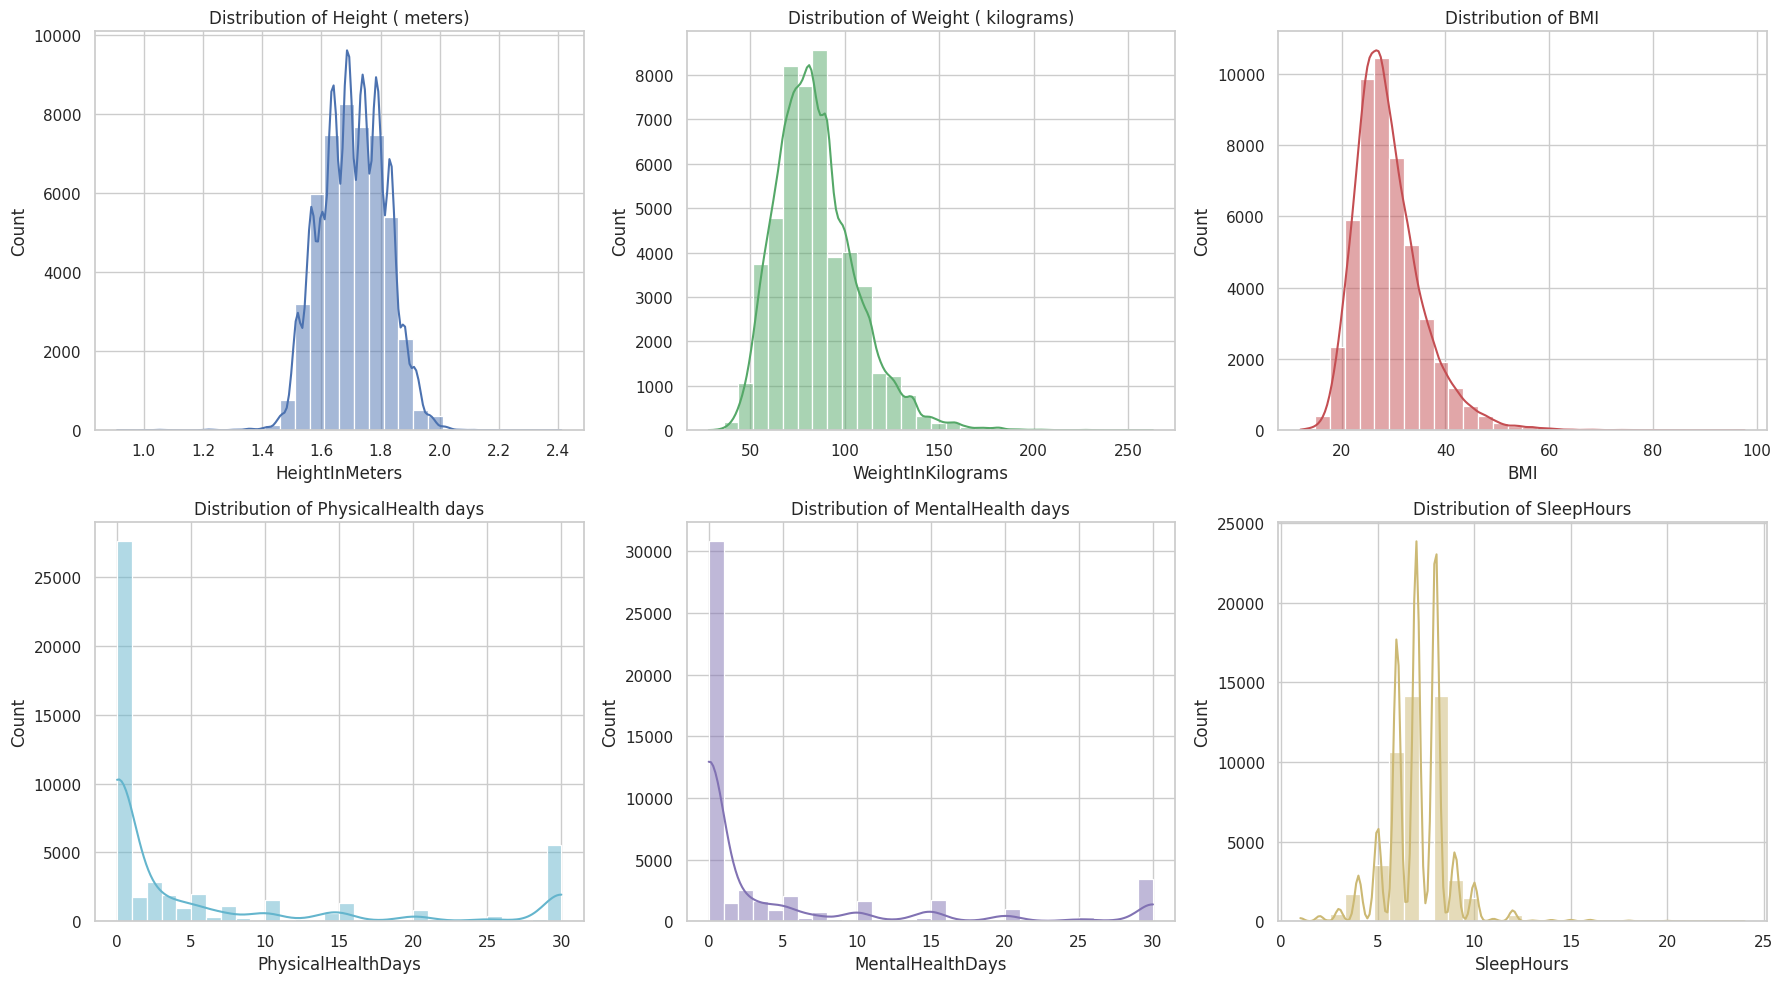

In [9]:
sns.set(style="whitegrid")

# 1. Visualizing Numeric Columns (HeightInMeters, WeightInKilograms, BMI, etc.)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Corrected figure size for better layout
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# List of plot colors
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot histograms for each column
for i, col in enumerate(continuous_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color=colors[i])
    axes[i].set_title(f'Distribution of {col.replace("In", " (").replace("Kilograms", " kilograms)").replace("Meters", " meters)").replace("Days", " days")}')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [10]:
def remove_outliers_iqr_multiple(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_no_outliers = remove_outliers_iqr_multiple(df, continuous_columns)

print("\nDataFrame after removing outliers from multiple columns:\n", df_no_outliers)

df=df_no_outliers.copy()



DataFrame after removing outliers from multiple columns:
                 State     Sex GeneralHealth  PhysicalHealthDays  \
1             Indiana  Female     Very good                   0   
2      South Carolina  Female     Very good                   0   
3             Arizona    Male     Very good                   0   
4               Texas  Female          Good                   0   
6       West Virginia    Male          Good                   0   
...               ...     ...           ...                 ...   
49637            Ohio  Female     Very good                   0   
49638         Georgia  Female     Very good                   0   
49639       Wisconsin    Male          Good                   0   
49641       Tennessee  Female          Good                   2   
49642            Utah    Male     Excellent                   0   

       MentalHealthDays                                    LastCheckupTime  \
1                     3  Within past year (anytime less th

In [11]:
# Standardize continuous columns
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

In [13]:
STATE ={
    'Alabama': 1,
    'Alaska' :2,
    'Arizona':3,
    'Arkansas':4,
    'California':5,
    'Colorado':6,
    'Connecticut':7,
    'Delaware':8,
    'District of Columbia':9,
    'Florida':10,
    'Georgia':11,
    'Hawaii':12,
    'Idaho':13,
    'Illinois':14,
    'Indiana':15,
    'Iowa':16,
    'Kansas':17,
    'Kentucky':18,
    'Louisiana':19,
    'Maine':20,
    'Maryland':21,
    'Massachusetts':22,
    'Michigan':23,
    'Minnesota':24,
    'Mississippi':25,
    'Missouri':26,
    'Montana':27,
    'Nebraska':28,
    'Nevada':29,
    'New Hampshire':30,
    'New Jersey':31,
    'New Mexico':32,
    'New York':33,
    'North Carolina':34,
    'North Dakota':35,
    'Ohio':36,
    'Oklahoma':37,
    'Oregon':38,
    'Pennsylvania':39,
    'Rhode Island':40,
    'South Carolina':41,
    'South Dakota':42,
    'Tennessee':43,
    'Texas':44,
    'Utah':45,
    'Vermont':46,
    'Virginia':47,
    'Washington':48,
    'West Virginia':49,
    'Wisconsin':50,
    'Wyoming':51,
    'Guam':52,
    'Puerto Rico':53,
    'Virgin Islands':54
}

SEX = {'Male':1, 'Female':2}

GEN_HEALTH = {
    "Excellent": 1,
    "Very good": 2,
    "Good": 3 ,
    "Fair": 4,
    "Poor": 5
}

PHYS_MEN_HEALTH = {77: np.nan,
               88: 0,
               99: np.nan
                  }

LAST_CHECKUP = {
    "Within past year (anytime less than 12 months ago)" : 1,
    "Within past 2 years (1 year but less than 2 years ago)": 2,
    "Within past 5 years (2 years but less than 5 years ago)": 3,
    "5 or more years ago": 4
}

YES_NO_QUESTIONS = {'Yes': 1, 'No': 2}

SLEEP_TIME = lambda x: np.where(x > 24, np.nan, x)

TEETH_REMOVED = {
    "1 to 5" : 1,
    "6 or more, but not all": 2,
    "All": 3,
    "None of them": 4
}

DIABETES = {
    "Yes" :1,
    "Yes, but only during pregnancy (female)": 2,
    "No": 3,
    "No, pre-diabetes or borderline diabetes": 4,
}

SMOKER_STATUS = {
    "Current smoker - now smokes every day": 1,
    "Current smoker - now smokes some days": 2,
    "Former smoker": 3,
    "Never smoked": 4
}

ECIGARETTES = {
    "Never used e-cigarettes in my entire life": 1,
    "Use them every day": 2,
    "Use them some days": 3,
    "Not at all (right now)": 4
}

RACE = {
    "White only, Non-Hispanic" :1,
    "Black only, Non-Hispanic" : 2,
    "Other race only, Non-Hispanic": 3,
    "Multiracial, Non-Hispanic": 4,
    "Hispanic": 5
}

AGE_CATEGORY = {
    "Age 18 to 24" :1,
    "Age 25 to 29" :2,
    "Age 30 to 34" :3,
    "Age 35 to 39" :4,
    "Age 40 to 44" :5,
    "Age 45 to 49" :6,
    "Age 50 to 54" :7,
    "Age 55 to 59" :8,
    "Age 60 to 64" :9,
    "Age 65 to 69" :10,
    "Age 70 to 74" :11,
    "Age 75 to 79" :12,
    "Age 80 or older" :13
}

TETANUS = {
    "Yes, received Tdap" :1,
    "Yes, received tetanus shot, but not Tdap" :2,
    "Yes, received tetanus shot but not sure what type" :3,
    "No, did not receive any tetanus shot in the past 10 years" :4,
}

COVID = {
    "Yes" :1,
    "No" :2,
    "Tested positive using home test without a health professional" :3}

In [14]:
df['State'] = df['State'].map(STATE)
df['Sex'] = df['Sex'].map(SEX)
df['GeneralHealth'] = df['GeneralHealth'].map(GEN_HEALTH)
df['PhysicalHealthDays'] = df['PhysicalHealthDays'].replace(PHYS_MEN_HEALTH)
df['MentalHealthDays'] = df['MentalHealthDays'].replace(PHYS_MEN_HEALTH)
df['LastCheckupTime'] = df['LastCheckupTime'].map(LAST_CHECKUP)
df['PhysicalActivities'] = df['PhysicalActivities'].map(YES_NO_QUESTIONS)
df['SleepHours'] = df['SleepHours'].apply(SLEEP_TIME)
df['RemovedTeeth'] = df['RemovedTeeth'].map(TEETH_REMOVED)
#df['HadHeartAttack'] = df['HadHeartAttack'].map(YES_NO_QUESTIONS)
#df['HadAngina'] = df['HadAngina'].map(YES_NO_QUESTIONS)
#df['HadStroke'] = df['HadStroke'].map(YES_NO_QUESTIONS)
df['HadAsthma'] = df['HadAsthma'].map(YES_NO_QUESTIONS)
df['HadSkinCancer'] = df['HadSkinCancer'].map(YES_NO_QUESTIONS)
df['HadCOPD'] = df['HadCOPD'].map(YES_NO_QUESTIONS)
df['HadDepressiveDisorder'] = df['HadDepressiveDisorder'].map(YES_NO_QUESTIONS)
df['HadKidneyDisease'] = df['HadKidneyDisease'].map(YES_NO_QUESTIONS)
df['HadArthritis'] = df['HadArthritis'].map(YES_NO_QUESTIONS)
df['HadDiabetes'] = df['HadDiabetes'].map(DIABETES)
df['DeafOrHardOfHearing'] = df['DeafOrHardOfHearing'].map(YES_NO_QUESTIONS)
df['BlindOrVisionDifficulty'] = df['BlindOrVisionDifficulty'].map(YES_NO_QUESTIONS)
df['DifficultyConcentrating'] = df['DifficultyConcentrating'].map(YES_NO_QUESTIONS)
df['DifficultyWalking'] = df['DifficultyWalking'].map(YES_NO_QUESTIONS)
df['DifficultyDressingBathing'] = df['DifficultyDressingBathing'].map(YES_NO_QUESTIONS)
df['DifficultyErrands'] = df['DifficultyErrands'].map(YES_NO_QUESTIONS)
df['SmokerStatus'] = df['SmokerStatus'].map(SMOKER_STATUS)
df['ECigaretteUsage'] = df['ECigaretteUsage'].map(ECIGARETTES)
df['ChestScan'] = df['ChestScan'].map(YES_NO_QUESTIONS)
df['RaceEthnicityCategory'] = df['RaceEthnicityCategory'].map(RACE)
df['AgeCategory'] = df['AgeCategory'].map(AGE_CATEGORY)
df['HeightInMeters'] = df['HeightInMeters'] / 100
df['WeightInKilograms'] = df['WeightInKilograms'] / 100
df['BMI'] = df['BMI'] / 100
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].map(YES_NO_QUESTIONS)
df['HIVTesting'] = df['HIVTesting'].map(YES_NO_QUESTIONS)
df['FluVaxLast12'] = df['FluVaxLast12'].map(YES_NO_QUESTIONS)
df['PneumoVaxEver'] = df['PneumoVaxEver'].map(YES_NO_QUESTIONS)
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map(TETANUS)
df['HighRiskLastYear'] = df['HighRiskLastYear'].map(YES_NO_QUESTIONS)
df['CovidPos'] = df['CovidPos'].map(COVID)

new_df= df.copy()

In [15]:
nans = df.isna().sum()
print(nans)

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLa

In [16]:
df.to_csv('heart_disease_cleaned_new.csv', index=False)

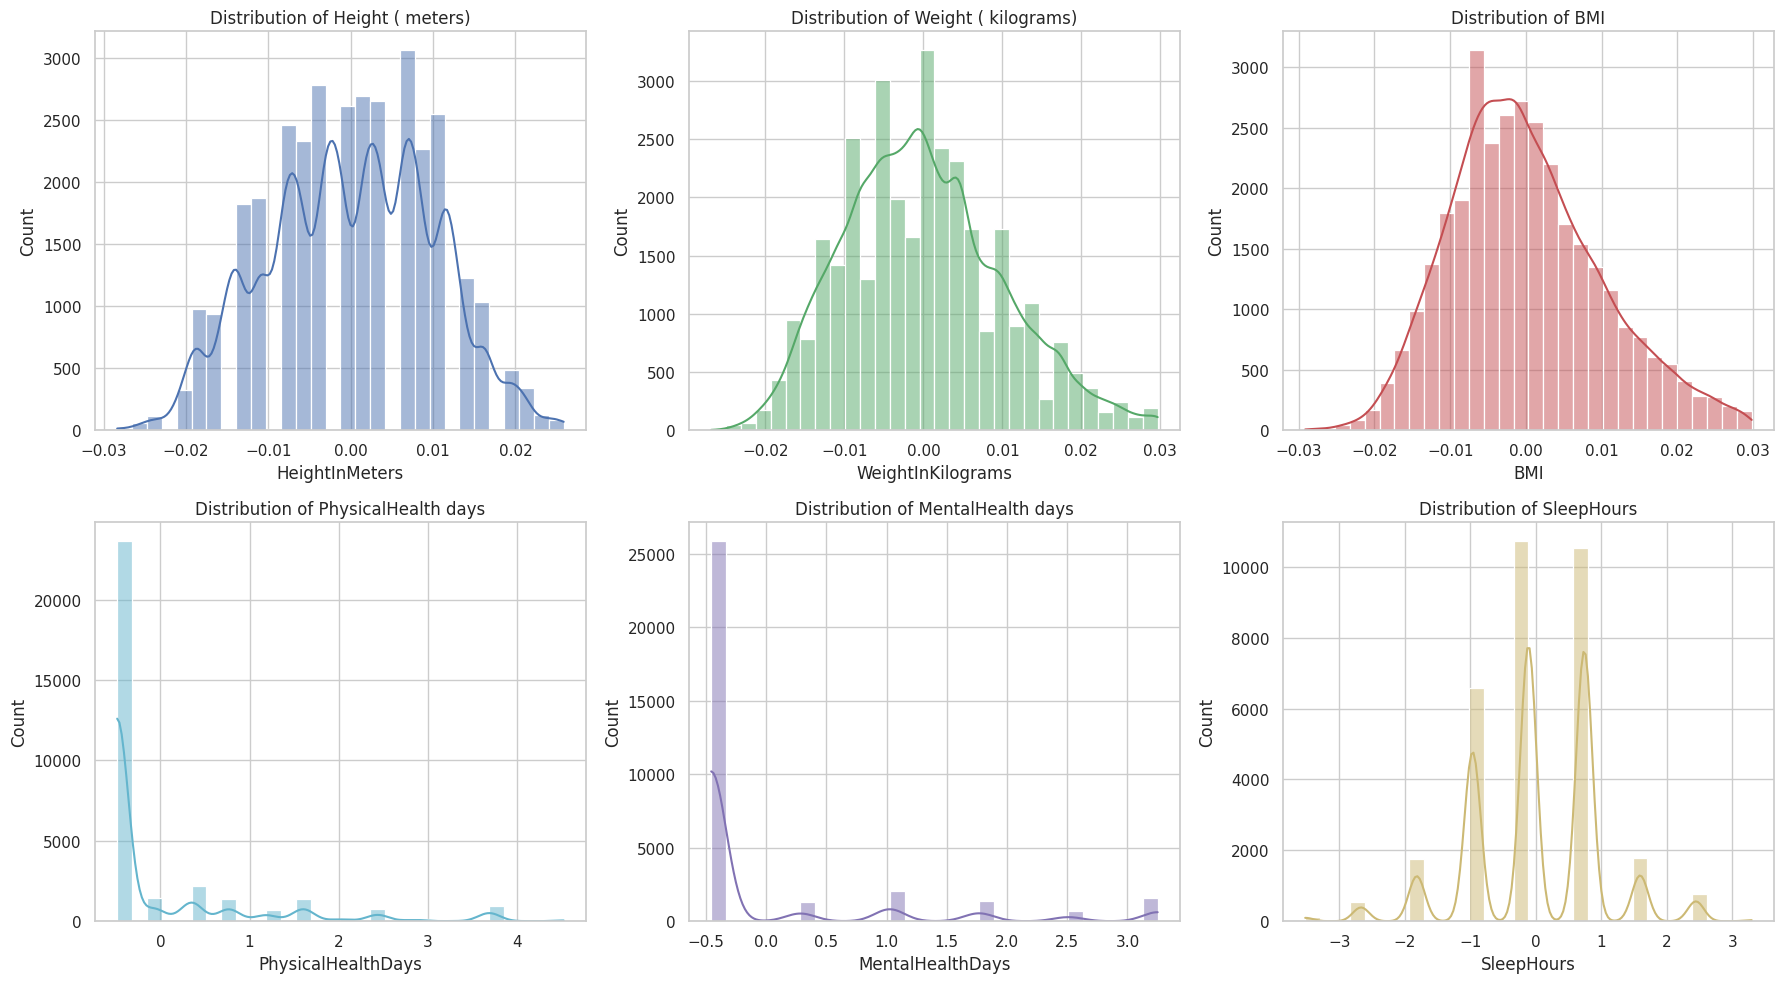

In [19]:
sns.set(style="whitegrid")

# 1. Visualizing Numeric Columns (HeightInMeters, WeightInKilograms, BMI, etc.)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Corrected figure size for better layout
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# List of plot colors
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot histograms for each column
for i, col in enumerate(continuous_columns):
    sns.histplot(new_df[col], kde=True, ax=axes[i], bins=30, color=colors[i])
    axes[i].set_title(f'Distribution of {col.replace("In", " (").replace("Kilograms", " kilograms)").replace("Meters", " meters)").replace("Days", " days")}')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

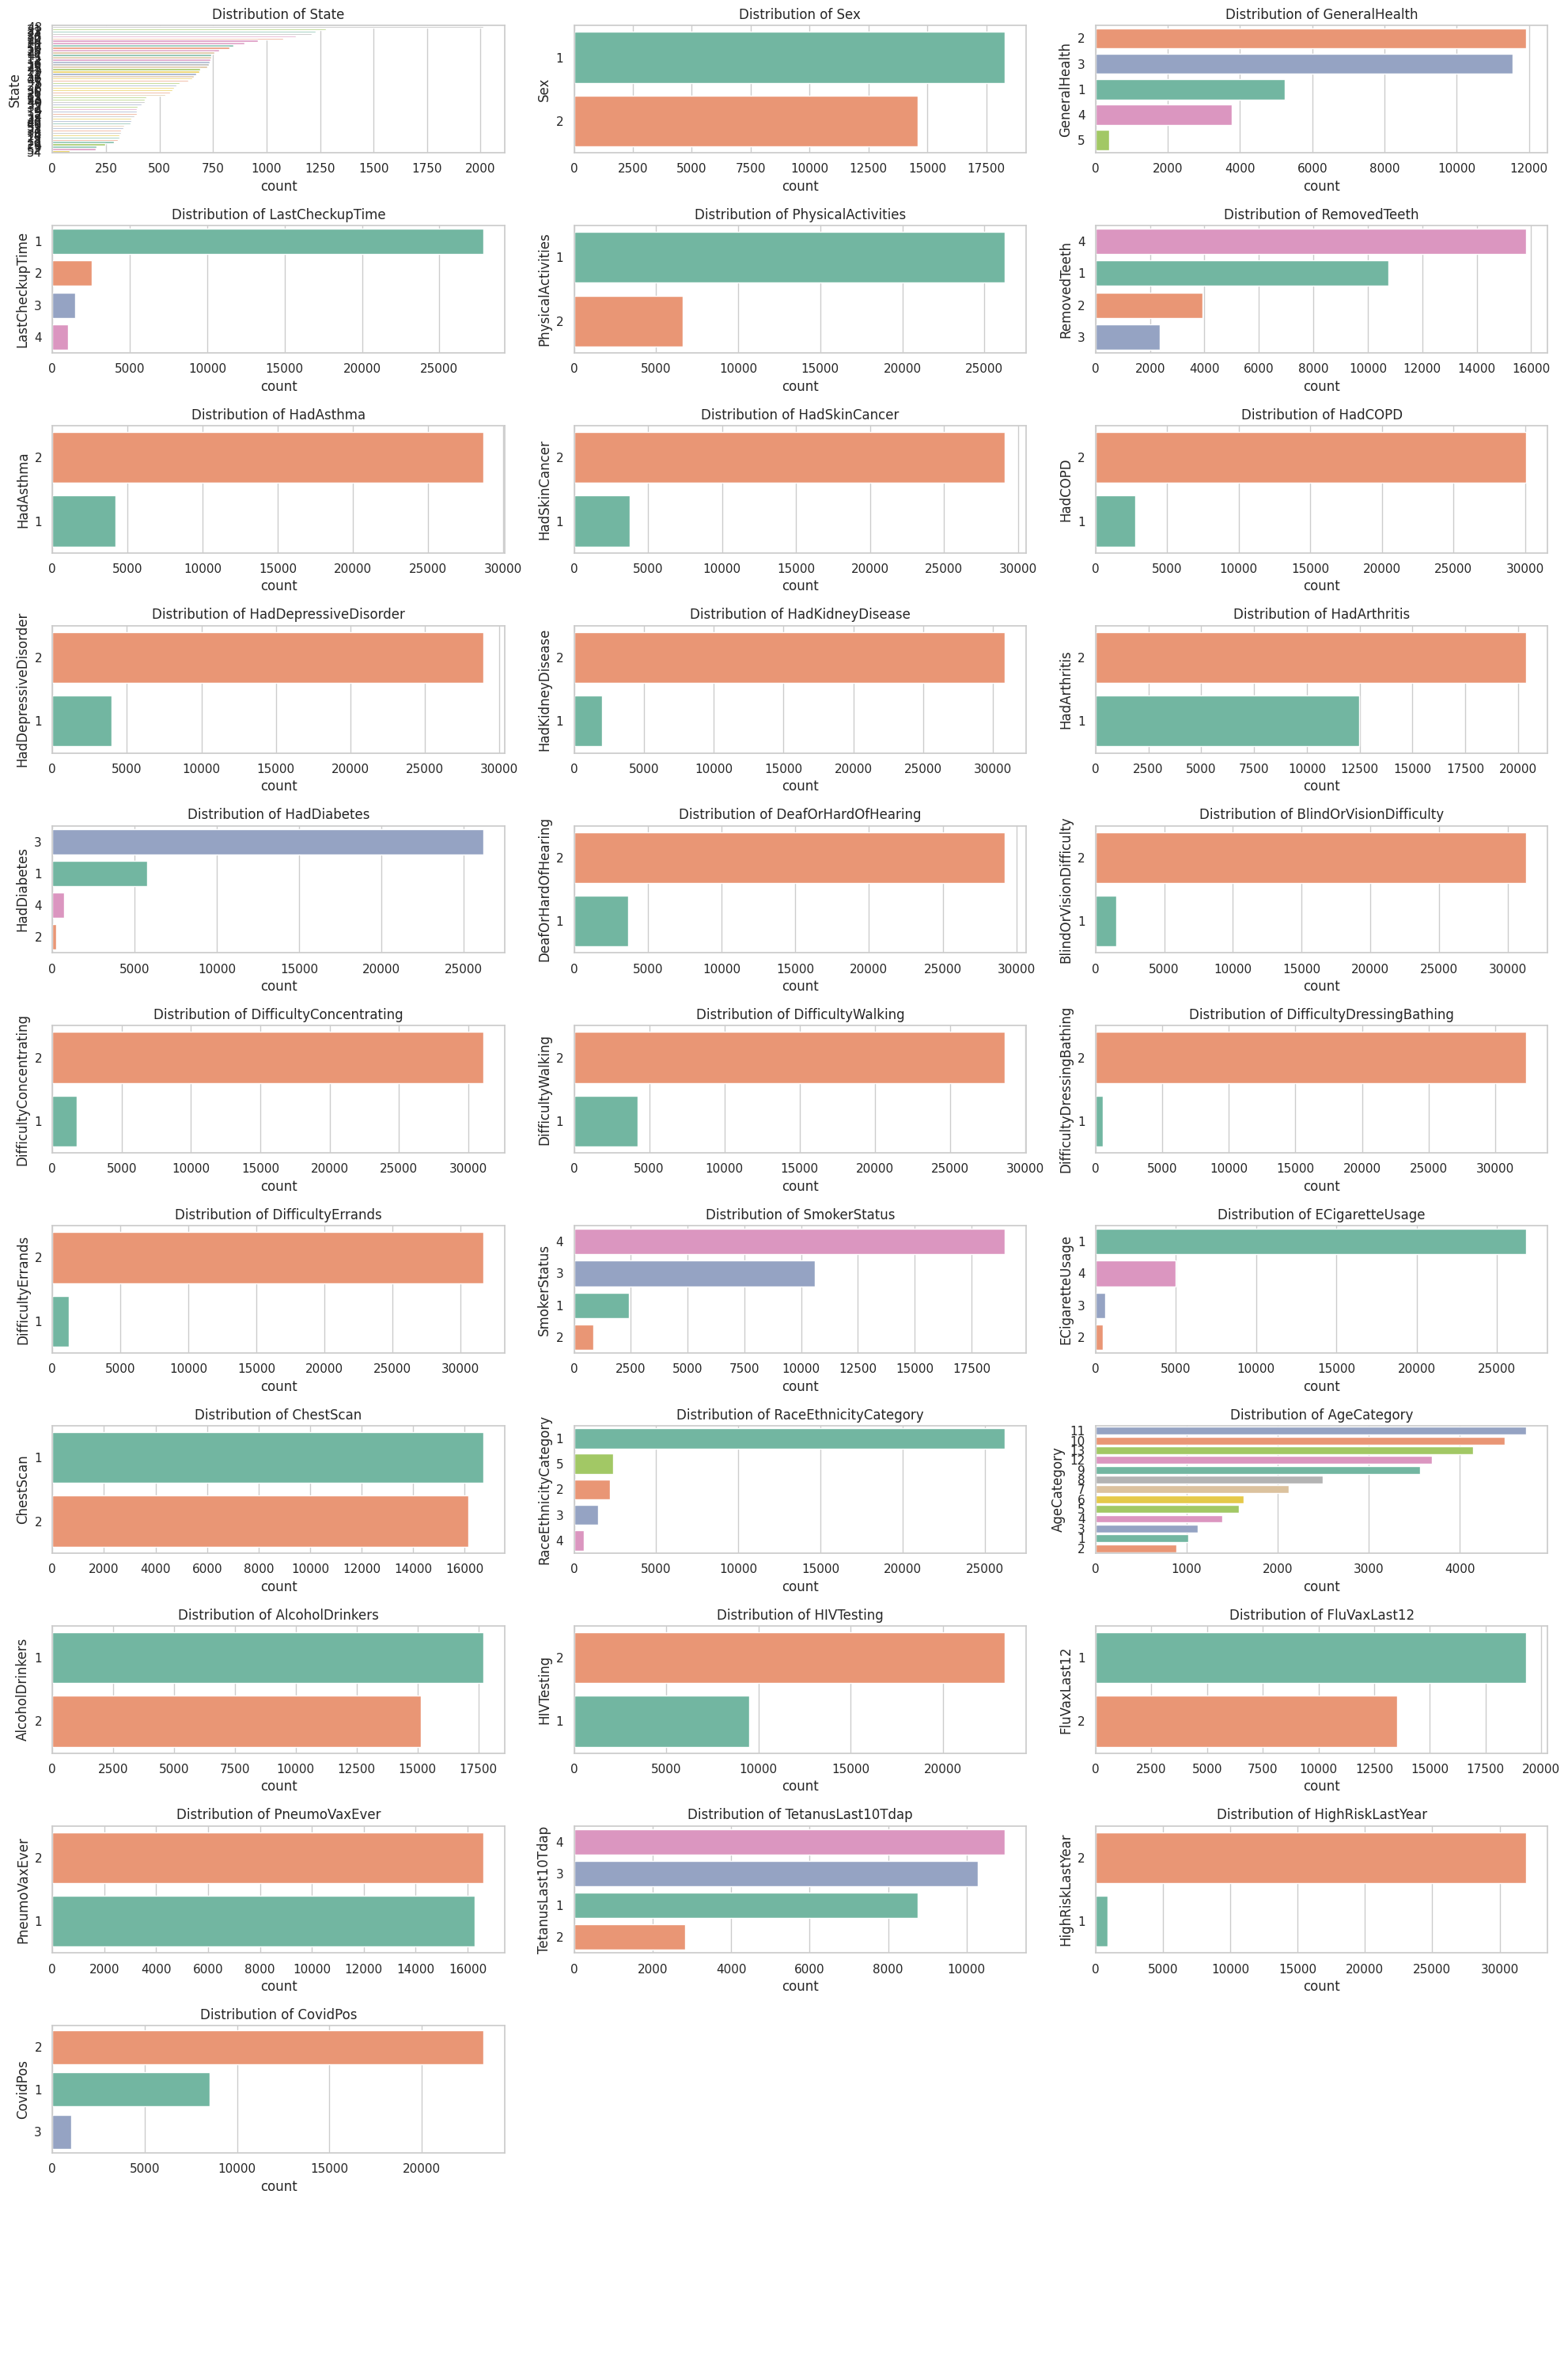

In [20]:
# 2. Visualizing Categorical Columns (e.g., 'State', 'Sex', 'GeneralHealth')
categorical_columns=new_df.copy()
categorical_columns.drop(columns=['HeightInMeters','WeightInKilograms','BMI','Heart Disease','PhysicalHealthDays','MentalHealthDays','SleepHours'], inplace=True)

fig, axes = plt.subplots(12, 3, figsize=(20, 30))  # Adjust height for better spacing

# Flatten the axes array to easily access each subplot in a single loop
axes = axes.flatten()

# Loop through each categorical column and plot
for index, col in enumerate(categorical_columns.columns):
    sns.countplot(y=col, data=categorical_columns, hue= col,palette='Set2', ax=axes[index],
                  order=categorical_columns[col].value_counts().index, legend=False)
    axes[index].set_title(f'Distribution of {col}')


# Hide any unused subplots if there are fewer than 36 categorical columns
for i in range(len(categorical_columns.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

<ipython-input-14-cb20907105d0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GeneralHealth', y='BMI', data=df, palette='Set3')


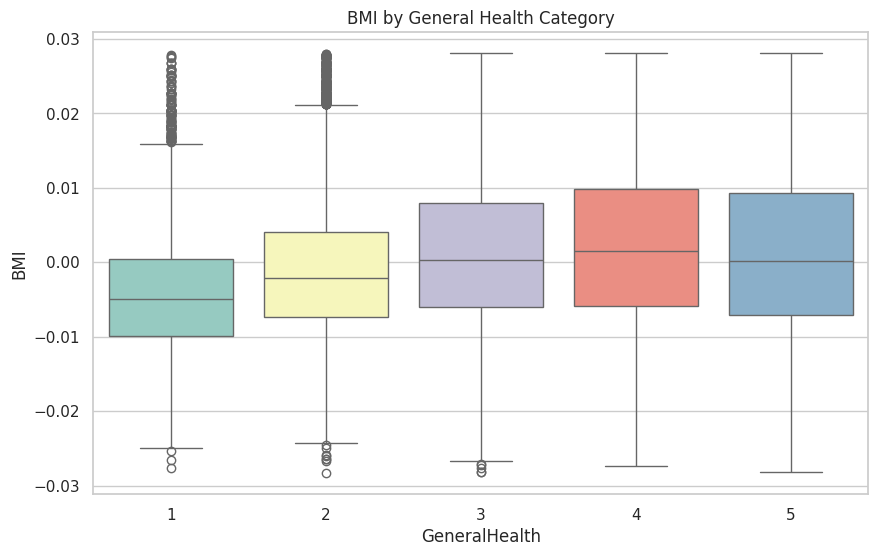

In [ ]:
# 3. Visualizing relationships between numeric and categorical data
# Boxplot of BMI by General Health category
plt.figure(figsize=(10, 6))
sns.boxplot(x='GeneralHealth', y='BMI', data=df, palette='Set3')
plt.title('BMI by General Health Category')
plt.show()

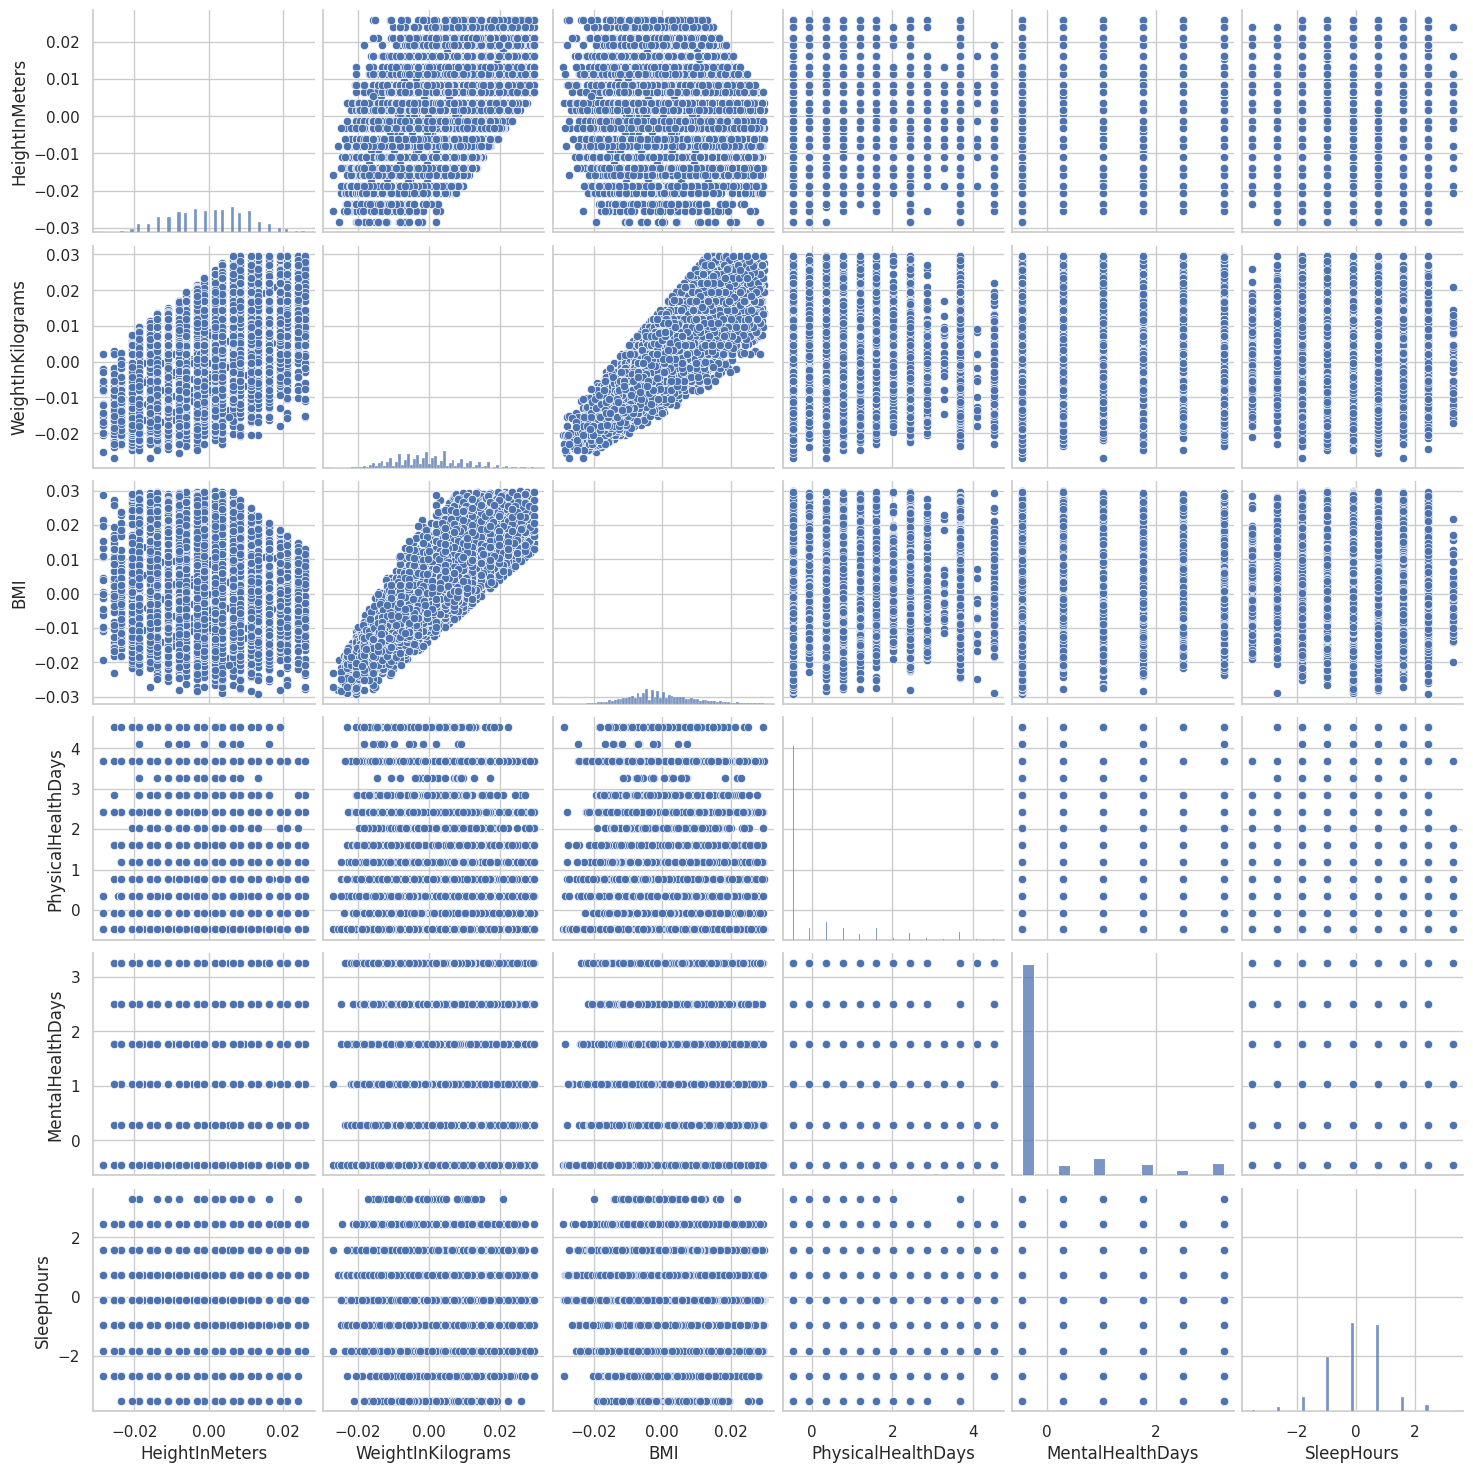

In [21]:
# Pairplot to show relationships among numeric columns
sns.pairplot(df[['HeightInMeters', 'WeightInKilograms', 'BMI','PhysicalHealthDays','MentalHealthDays','SleepHours']])
plt.show()

In [22]:
from scipy.stats import chi2_contingency

categorical_columns=new_df.copy()
categorical_columns.drop(columns=['HeightInMeters','WeightInKilograms','BMI','PhysicalHealthDays','MentalHealthDays','SleepHours'], inplace=True)

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calculate Cramér's V matrix
columns = categorical_columns.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(categorical_columns[col1], categorical_columns[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

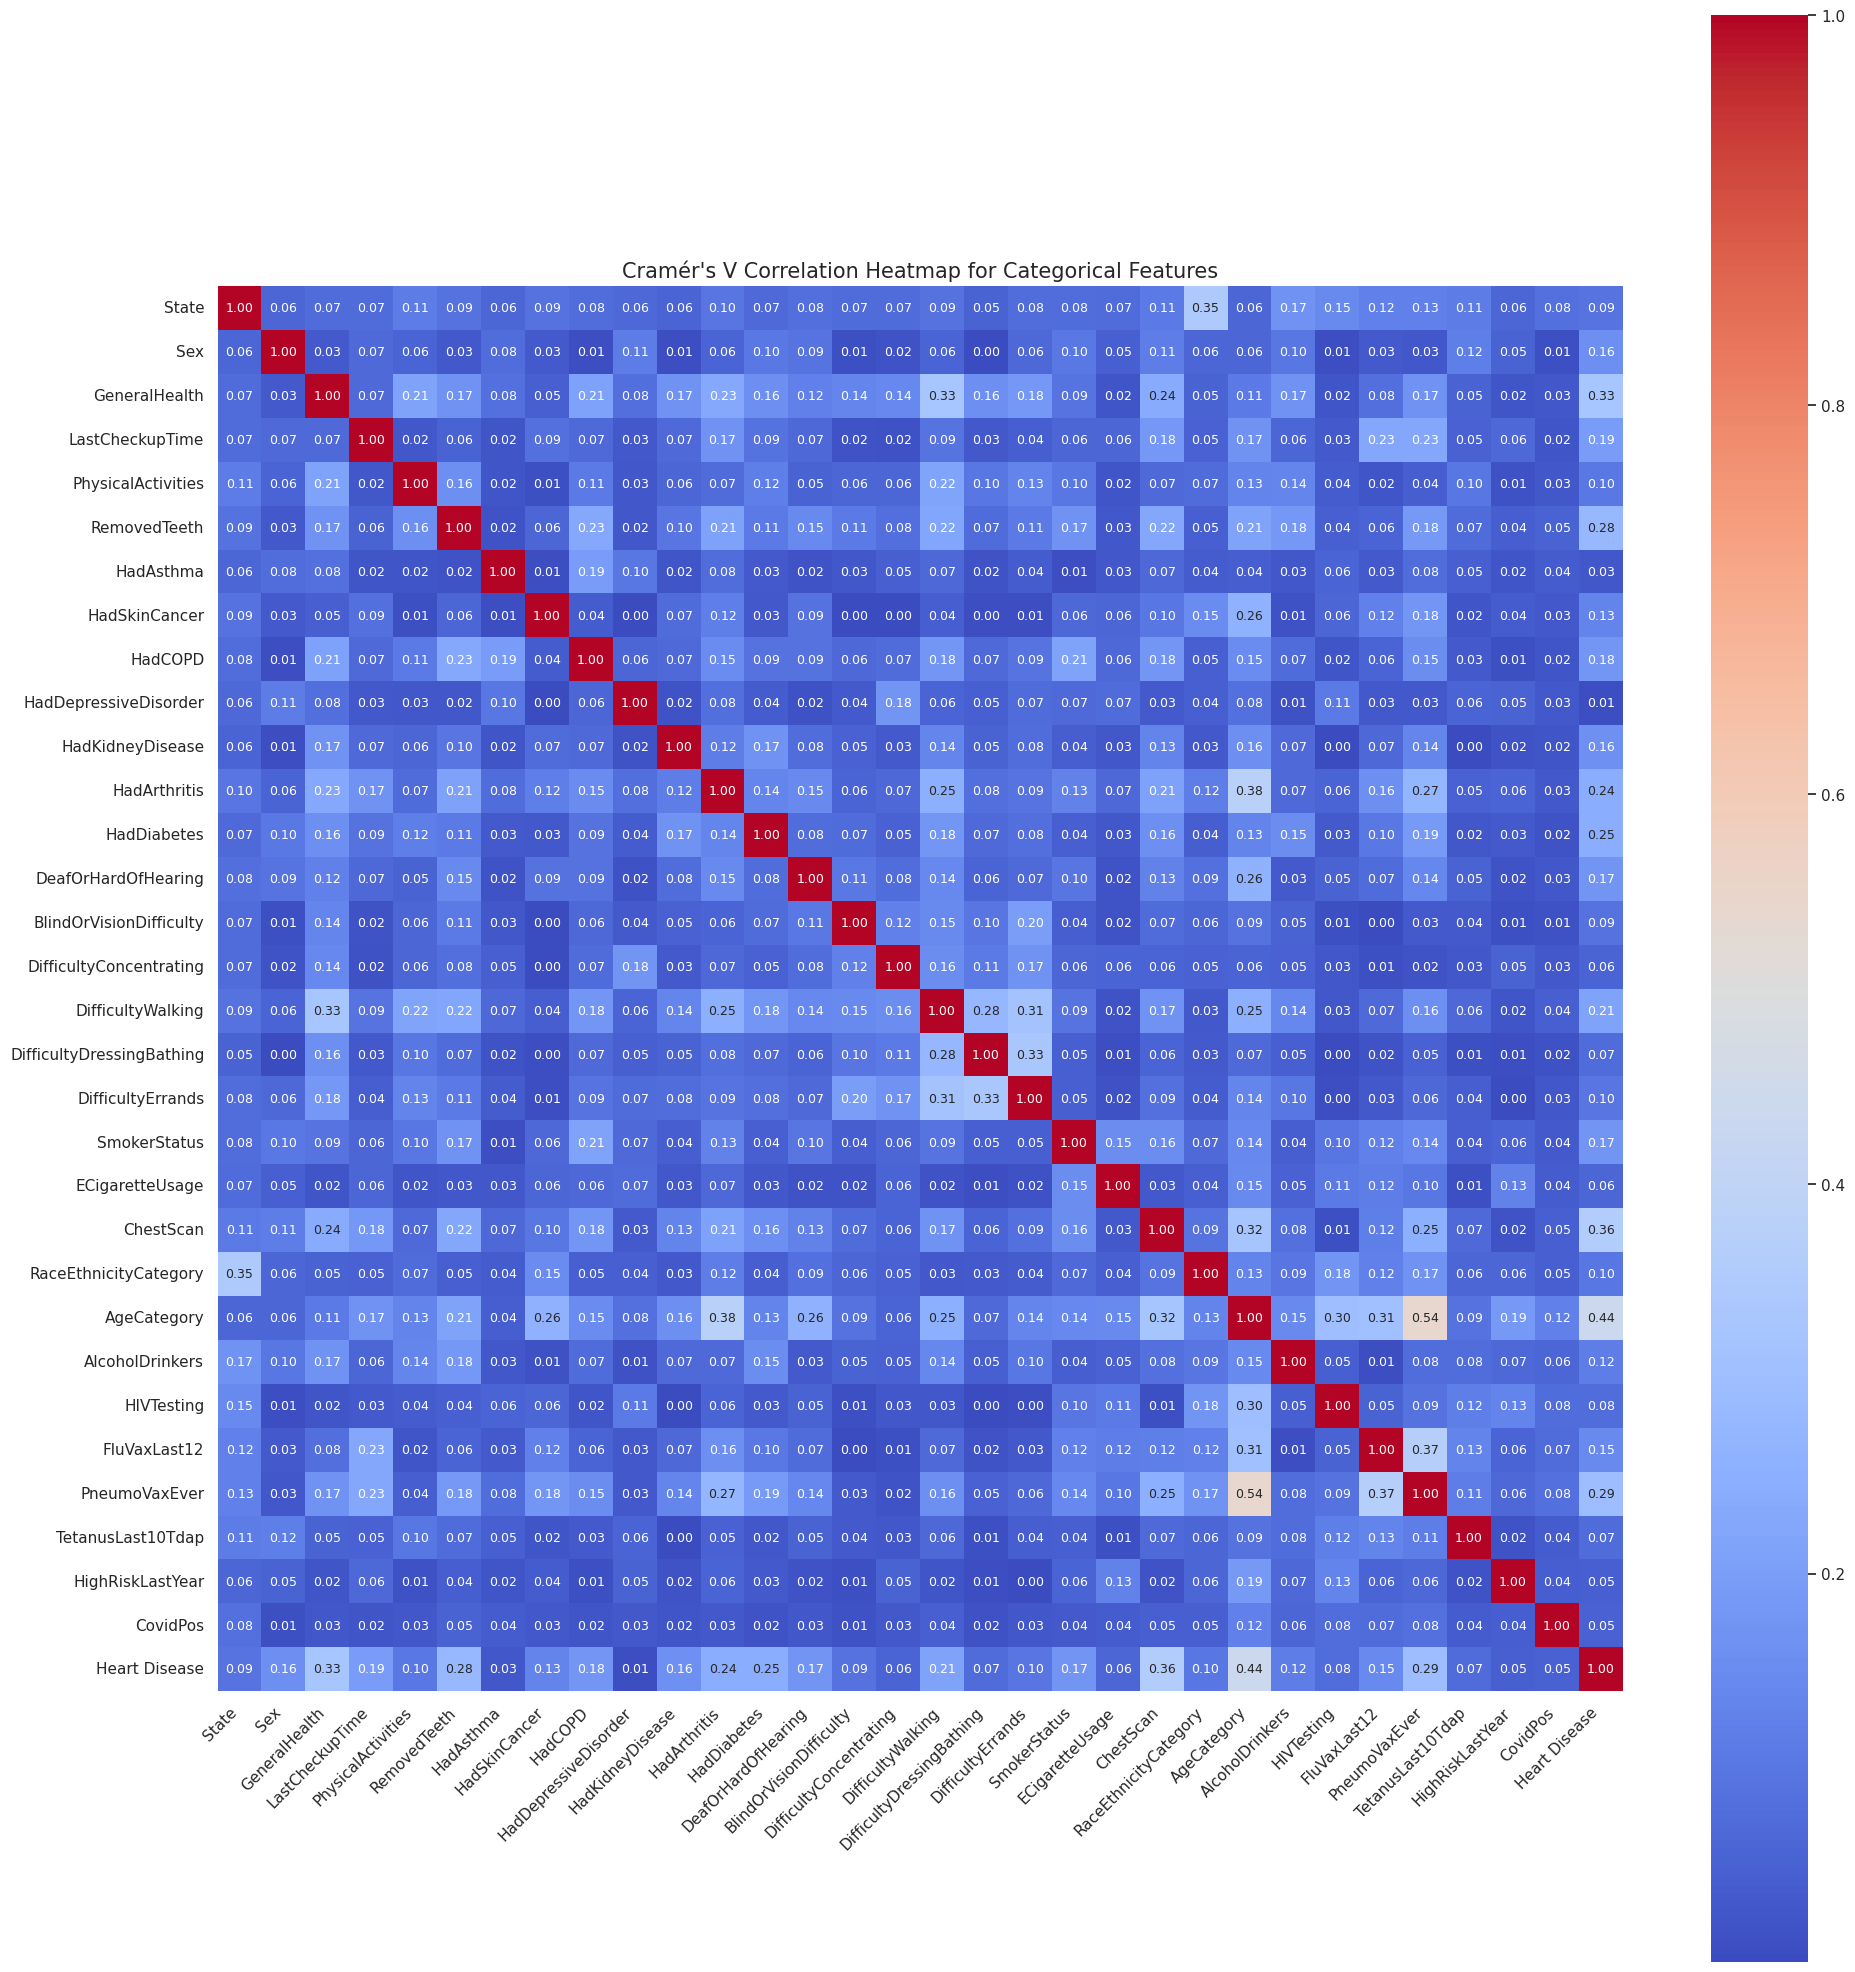

In [23]:
plt.figure(figsize=(20, 20))  # Increase figure size
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            annot_kws={"size": 9})  # Adjust annotation font size
plt.xticks(rotation=45, ha='right', fontsize=11)  # Rotate x-axis labels
plt.yticks(fontsize=11)  # Adjust y-axis label size
plt.title("Cramér's V Correlation Heatmap for Categorical Features", fontsize=15)
plt.tight_layout()  # Adjust layout for larger plots
plt.show()

In [24]:
categorical_columns=new_df.copy()
categorical_columns.drop(columns=['HeightInMeters','WeightInKilograms','BMI','Heart Disease','PhysicalHealthDays','MentalHealthDays','SleepHours'], inplace=True)

In [25]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(categorical_columns, new_df['Heart Disease'])

mutual_info_df = pd.DataFrame(mutual_info, index=categorical_columns.columns, columns=['Mutual Information Score'])
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information Score', ascending=False)

print(mutual_info_df)


                           Mutual Information Score
AgeCategory                                0.105074
ChestScan                                  0.071726
GeneralHealth                              0.052001
PneumoVaxEver                              0.043417
RemovedTeeth                               0.040068
HadDiabetes                                0.032268
HadArthritis                               0.030097
DeafOrHardOfHearing                        0.023996
HadKidneyDisease                           0.023923
DifficultyWalking                          0.023895
HadCOPD                                    0.019272
SmokerStatus                               0.018615
LastCheckupTime                            0.018044
Sex                                        0.017534
HadSkinCancer                              0.010778
AlcoholDrinkers                            0.009317
HIVTesting                                 0.009000
DifficultyErrands                          0.008158
HighRiskLast

<Figure size 1500x1500 with 0 Axes>

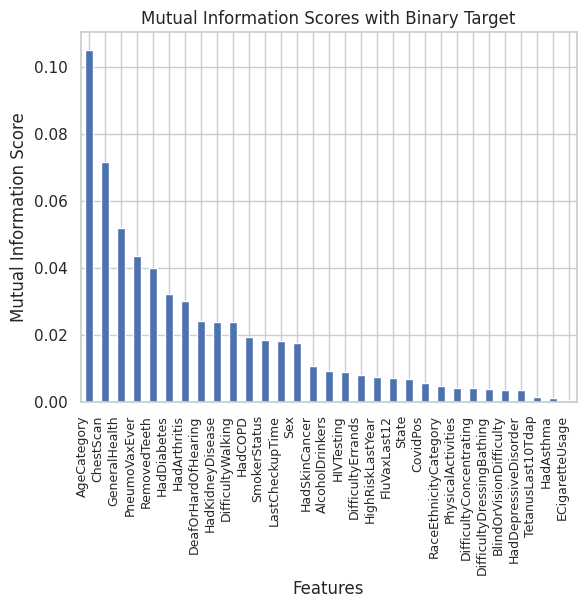

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
mutual_info_df.plot(kind='bar', legend=False)
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.title('Mutual Information Scores with Binary Target')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.show()


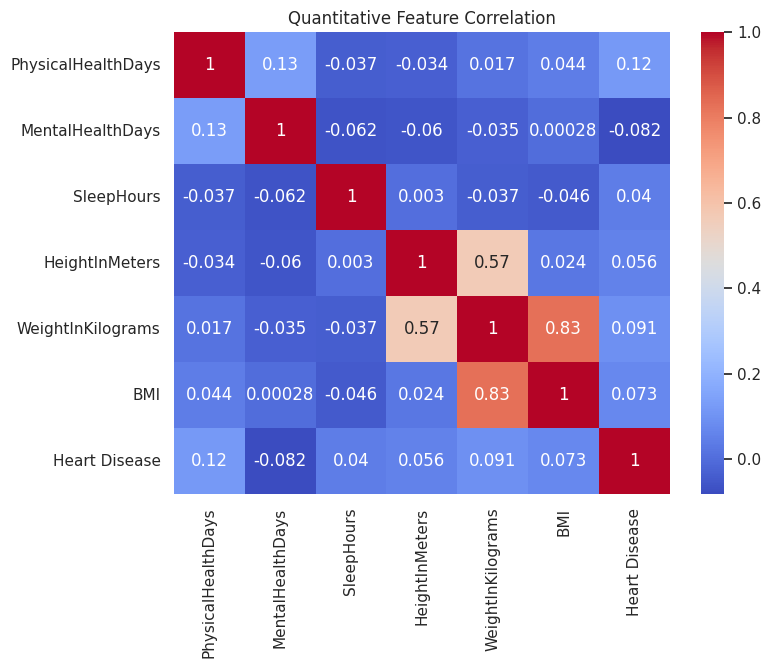

In [27]:
quantitative_columns=new_df.copy()
quantitative_columns.drop(columns=categorical_columns,inplace=True)

corr= quantitative_columns.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Title and labels
plt.title('Quantitative Feature Correlation')
plt.show()